<a href="https://colab.research.google.com/github/ftoguzalp/First-Recommendation-Engine/blob/main/Game-Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [84]:
df=pd.read_csv("/content/drive/MyDrive/vgsales.csv")

In [4]:
df.sample(n=5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7427,7429,Famicom Mini: Ganbare Goemon! Karakuri Douchuu,GBA,2004.0,Platform,Konami Digital Entertainment,0.00,0.00,0.20,0.01,0.21
113,114,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90
6844,6846,Megamind: Mega Team Unite,Wii,2010.0,Adventure,THQ,0.16,0.06,0.00,0.02,0.24
5773,5775,Mountain King,2600,1982.0,Action,CBS Electronics,0.29,0.02,0.00,0.00,0.31
15886,15889,Koihime Enbu,PS4,2016.0,Fighting,Yeti,0.00,0.00,0.02,0.00,0.02


In [76]:
df= df.set_index('Rank', append=True)

In [78]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [85]:
df.Rank

0            1
1            2
2            3
3            4
4            5
         ...  
16593    16596
16594    16597
16595    16598
16596    16599
16597    16600
Name: Rank, Length: 16598, dtype: int64

In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Rank                                   16600
Name            ¡Shin Chan Flipa en colores!
Platform                                XOne
Year                                  2020.0
Genre                               Strategy
NA_Sales                               41.49
EU_Sales                               29.02
JP_Sales                               10.22
Other_Sales                            10.57
Global_Sales                           82.74
dtype: object

This means our dataset only contains game before 2020

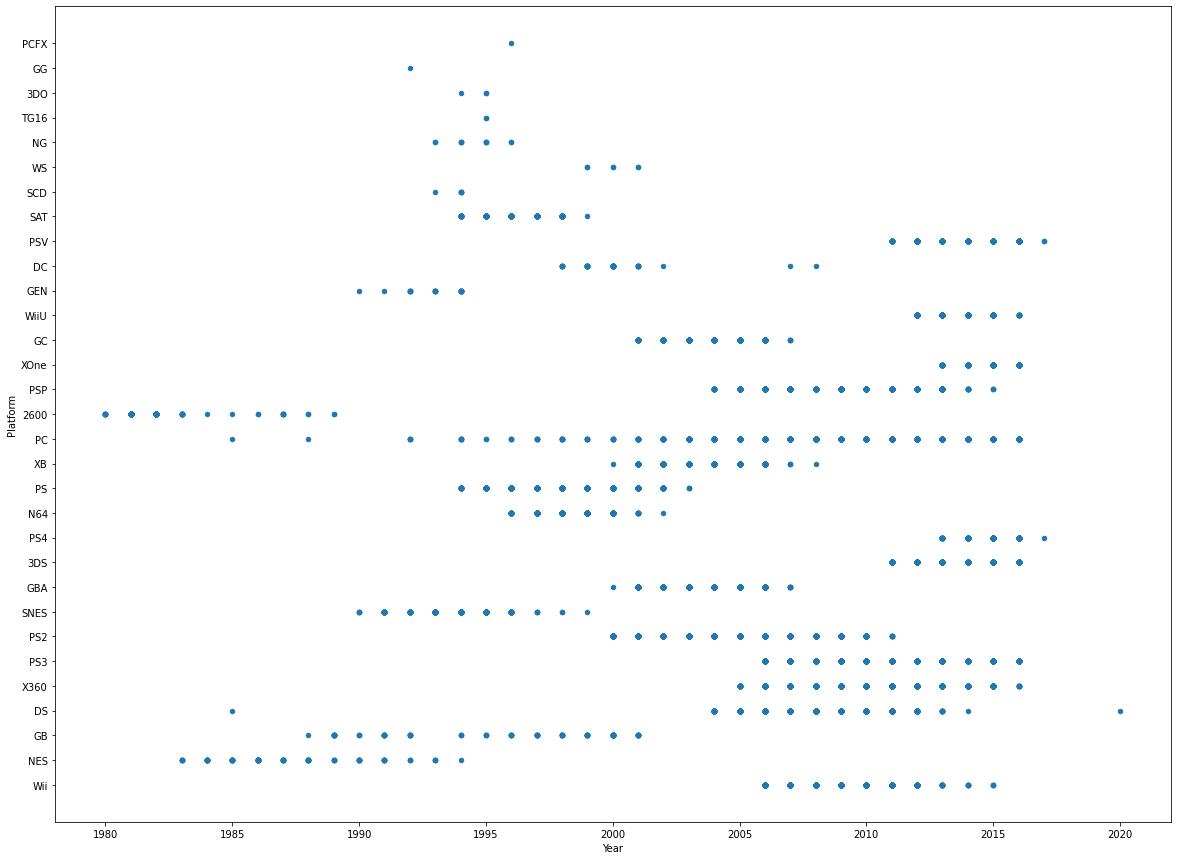

In [23]:
df.plot.scatter(x="Year",y="Platform",figsize=(20,15))

In [32]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [33]:
df["Platform"].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [35]:
df.shape

(16598, 11)

In [42]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [45]:
df["Year"].median()

2007.0

In [48]:
df["Year"].fillna(value=2007,inplace=True)

In [49]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [50]:
df["Publisher"].fillna(value="",inplace=True)

In [51]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [52]:
features=df["Name"]+df["Platform"]+df["Year"]+df["Genre"]+df["Publisher"]

TypeError: ignored

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [56]:
df['Year'] = df['Year'].astype(str)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [58]:
features=df["Name"]+df["Platform"]+df["Year"]+df["Genre"]+df["Publisher"]

In [60]:
features.sample(n=10)

234      Luigi's Mansion: Dark Moon3DS2013.0ActionNintendo
12836    IL-2 Sturmovik: Cliffs of DoverPC2011.0Simulat...
10500      Top Gun: Combat ZonesGBA2004.0SimulationMastiff
11585      Striker 96PS1995.0SportsTime Warner Interactive
7793     Rock Band Country Track PackPS32009.0MiscMTV G...
8261            The Secret WorldPC2012.0Role-PlayingFuncom
2909            Star Wars: Obi-WanXB2001.0ActionActivision
5374     MotorStorm: Arctic EdgePS22009.0RacingSony Com...
14196    Game of Thrones (Telltale)X3602015.0AdventureT...
8395     The Naked Brothers Band: The Video GamePS22008...
dtype: object

In [61]:
vectorizer = TfidfVectorizer()

In [62]:
feature_vectors = vectorizer.fit_transform(features)

In [64]:
print(feature_vectors)

  (0, 1520)	0.4804747019099462
  (0, 18179)	0.7197306388448407
  (0, 20892)	0.5011305900985749
  (1, 848)	0.40697742126893105
  (1, 13736)	0.6535385618029546
  (1, 4774)	0.3488081892553463
  (1, 12717)	0.4100524301104158
  (1, 18666)	0.34270479786948677
  (2, 1076)	0.46514831370979987
  (2, 20906)	0.5984046446880574
  (2, 11344)	0.5179983804137304
  (2, 12717)	0.3965181021812772
  (3, 16183)	0.6393881808436672
  (3, 18174)	0.4219596040275209
  (3, 1520)	0.44483337351973107
  (3, 20892)	0.4639570201747348
  (4, 15042)	0.30362675396203787
  (4, 1130)	0.1713595220756543
  (4, 4492)	0.503541390942437
  (4, 15996)	0.33353051828045105
  (4, 15138)	0.7166939161565479
  (5, 958)	0.5381157056614786
  (5, 19164)	0.842870979047475
  (6, 7254)	0.5129375093970514
  (6, 13750)	0.4269499769645715
  :	:
  (16593, 6073)	0.3345374859189054
  (16593, 10647)	0.23349453441559864
  (16594, 7767)	0.5154902025354711
  (16594, 1192)	0.45106579889615084
  (16594, 3298)	0.366850370834473
  (16594, 12969)	0.33490

In [65]:
similarity = cosine_similarity(feature_vectors)

In [67]:
print(similarity)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.16259321 ... 0.         0.         0.        ]
 [0.         0.16259321 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [95]:
def game_suggest(game):
  list_of_all_titles = df['Name'].tolist()

  find_close_match = difflib.get_close_matches(game, list_of_all_titles)

  close_match = find_close_match[0]

  index_of_the_game_name = df[df.Name == close_match]['Rank'].values[0]

  similarity_score = list(enumerate(similarity[index_of_the_game_name]))

  sorted_similar_games = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

  print('Games for you : \n')

  i = 0

  for game in sorted_similar_games:
    index = game[0]
    title_from_index = df[df.Rank==index]['Name'].values[0]
    if (i<10):
      print(i, '.',title_from_index)
      i+=1  

In [98]:
game_suggest(game="Sonic")

Games for you : 

0 . Sonic CD
1 . Duke Nukem: Time to Kill
2 . Bejeweled 3
3 . Sniper Elite 3
4 . One Piece Unlimited Cruise 1: The Treasure Beneath the Waves
5 . Sacred 2: Fallen Angel
6 . Turning Point: Fall of Liberty
7 . LEGO Battles: Ninjago
8 . Devil May Cry 3: Dante's Awakening
9 . Mystery Tales 2: The Spirit Mask


IndexError: ignored